In [1]:
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
import Configuration
from importlib import reload
reload(Configuration)
from Configuration import ITERATIONS, NUMBER_OF_PRICES, MIN_PRICE, MAX_PRICE, PRICES, COST, DAYS, INTERVAL_LENGTH

In [17]:
min_price = MIN_PRICE
max_price = MAX_PRICE
number_of_prices = NUMBER_OF_PRICES # length of the prices vector
prices = PRICES
cost = COST
days = DAYS
interval_length = INTERVAL_LENGTH

def changing_x(d, noise):
    # we change value of x every 'interval_length' days
    t = d // interval_length # integer division

    t -= np.pi # just to make it start at 0

    x = np.sin(t)
    if noise:
        x -= np.random.uniform(0, 0.5)
    return (x+1)/4 # bounded between 0 and 0.5

conversion_probability_no_noise = lambda p,d: 1 - np.exp(p/max_price - 1)/2 - changing_x(d, noise=False)  # expected demand curve in terms of probability of purchase
conversion_probability = lambda p,d: 1 - np.exp(p/max_price - 1)/2 - changing_x(d, noise=True)  # expected demand curve in terms of probability of purchase

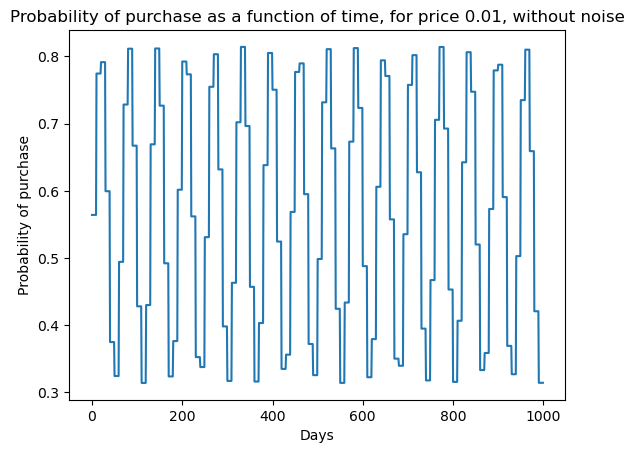

Text(0, 0.5, 'Probability of purchase')

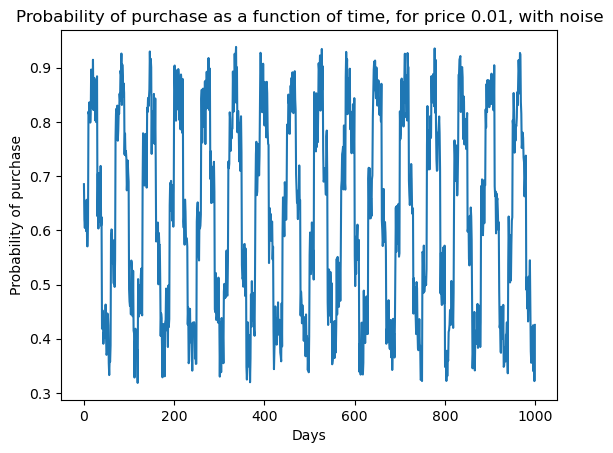

In [19]:
T = 1000
t_interval = range(T)
price = 0.01
probabilities = [conversion_probability_no_noise(price, t) for t in t_interval]
plt.plot(t_interval, probabilities)
plt.title('Probability of purchase as a function of time, for price %.2f, without noise' % price)
plt.xlabel('Days')
plt.ylabel('Probability of purchase')
plt.show()
probabilities = [conversion_probability(price, t) for t in t_interval]
plt.plot(t_interval, probabilities)
plt.title('Probability of purchase as a function of time, for price %.2f, with noise' % price)
plt.xlabel('Days')
plt.ylabel('Probability of purchase')

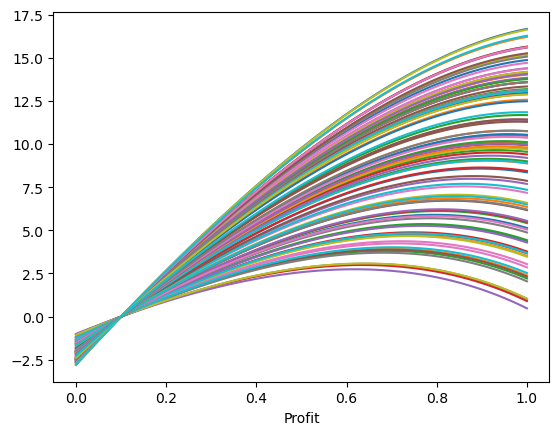

In [15]:
# let's plot the profit curves for different times
t_interval = range(0, 100)
n_users = 30 # just an example

for t in t_interval:
    expected_profit_curve = n_users*conversion_probability(prices, t)*(prices-cost)
    plt.plot(prices, expected_profit_curve)

plt.xlabel('Profit')
plt.show()